# Context

We observe $n$ clients. Each client $i$ survives for a duration of $T_i\geq 1$ month. Let a random sample of $n$ iid random variables $T_1 , \ldots , T_n$ following  a geometric distribution of unknown parameter $\theta$. From $T$ is defined $Y$ such that:
$$Y_i = \min (T_i, a_i)$$
Where:
* $\mathcal{A} := \{i \in \{1,2,...,n\} : Y_i< a_i\}$
* $a_i$ is the duration from the arrival of client $i$ to time of observation
* $Y_i$ is the duration before the client $i$ churned

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

```import functions as f``` : imports the package where we defined all of our functions

In [2]:
#GLOBAL CONSTANTS
clv_theory = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

# Geometric estimator (not censored)

We assume that the distribution followed by the lifetime values of customers is geometric (the success would be defined by the event of "churn"). Here, we suppose also that the data is not censored which means that all the lifetime values are known.

[Text(0.5, 1.0, 'Exponential distribution used for geometric estimator')]

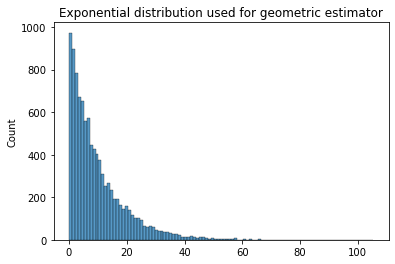

In [3]:
sns.histplot( f.generate_nc_exponential(clv_theory, size)).set(title="Exponential distribution used for geometric estimator")

**CLV computing**

To show that the Customer Lifetime Value (CLV) tends to the expected value, we can use the Law of Large Numbers and simulate a large number of customer lifetimes using Monte Carlo's approach. We can then calculate the mean of these simulated lifetimes and compare it to the expected value of the distribution. If the Law of Large Numbers holds, the simulated mean should approach the expected value as the number of simulated lifetimes increases.

The theoretical estimator is given by:
    
$$\hat{CLV}:=  \frac{\sum_{i=1}^n Y_i}{n}$$

In [4]:
# CONSTANT desining if the data is going to be censored or not
censored = 0
# Monte Carlo simulation
clv_geom, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.geom_clv_estimator, f.generate_nc_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.000107  
 	 Standard deviation CLV= 0.099724


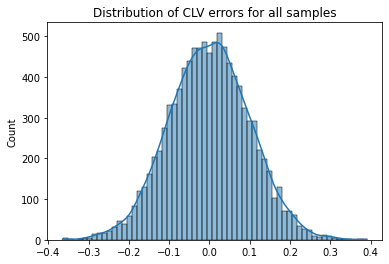

In [5]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_geom)

The plot illustrates that the prediction errors follow a Gaussian distribution with a mean of zero. This indicates that, as per the Law of Large Numbers, the estimator tends to converge towards the theoretical value which can be visualised in the following plot.

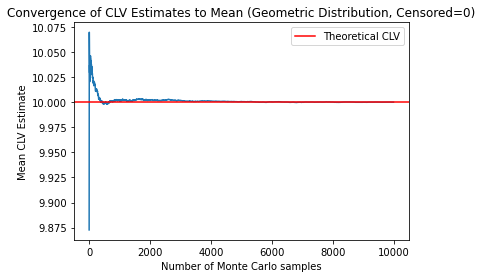

In [6]:
f.clv_convergence(clv_geom, clv_theory,n , 'Convergence of CLV Estimates to Mean (Geometric Distribution, Censored=0)')

**Confidence interval - Monte Carlo**

Since, we don't have the thoeretical approach to compute confidence interval for our best CLV estimator, we use the Monte Carlo method which is supposed to converge to the theoretical values.

(cf. Exponential(censored) case for the proof)

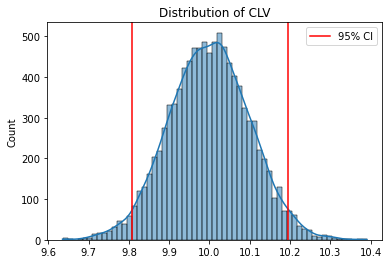

IC = [9.806659 , 10.195877 ] 


In [7]:
lower_geom_nc, upper_geom_nc = f.CI_plot_95(clv_geom, 0.05)

95% of the CLV values of the all the Monte Carlo samples are within this confidence interval.

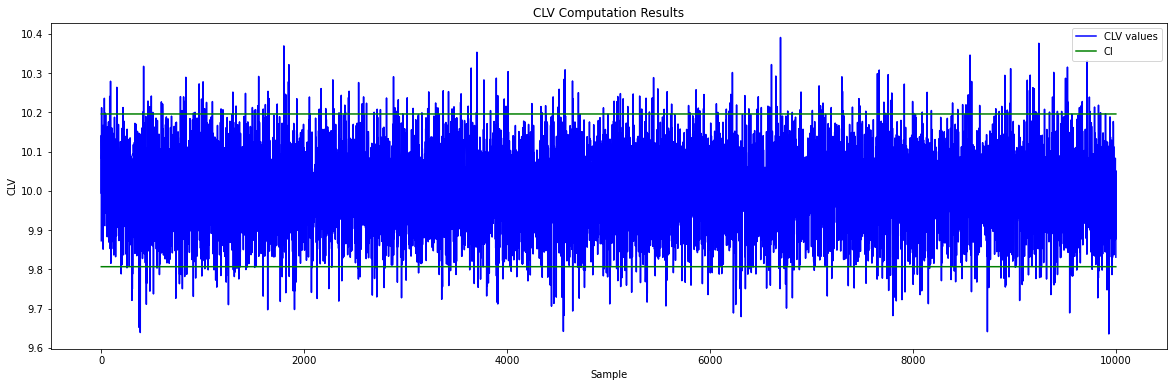

In [8]:
# plot confidence interval
f.CI_monoplot(clv_geom, np.full(size, lower_geom_nc),np.full(size, upper_geom_nc) )

This plot shows the values of `n` CLV obtained from the Monte Carlo simulations. The 95% confidence interval is displayed in green. This interval was constructed by computing the percentiles of all the CLV values generated in the Monte Carlo simulations. Averaging the results gives us the CI.

## Geometric (censored)

We assume that the distribution followed by the lifetime values of customers is geometric (the success would be defined by the event of "churn"). Here, we suppose also that the data is censored which means that the lifetime values are not all known.

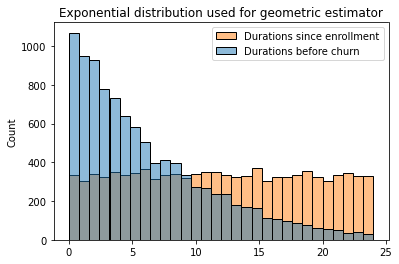

In [9]:
sns.histplot( f.generate_exponential(clv_theory, size,DureeObs)).set(title="Exponential distribution used for geometric estimator")
plt.legend(['Durations since enrollment','Durations before churn'])
plt.show()

**CLV computing**

Let's study the coherence of the estimator (based on geometric distribution with censored data).

The theoretical estimator is given by:

$$\hat{CLV}:= \frac{\sum_{i\in \mathcal{A}}y_i  + \sum_{i\in \mathcal{N} }a_i}{|\mathcal{A}|}$$

As we did before, here we are going to study the convergence of Monte Carlo method to our estimator.


In [10]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_geom_c, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.geom_c_clv_estimator, f.generate_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.004160  
 	 Standard deviation CLV= 0.126376


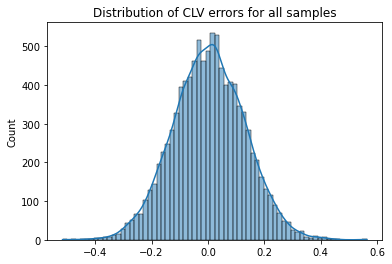

In [11]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_geom_c)

We still have a centered Gaussian error but the standard deviation with censored data has increased, which means that the model's predictions are less precise and have a higher degree of uncertainty.

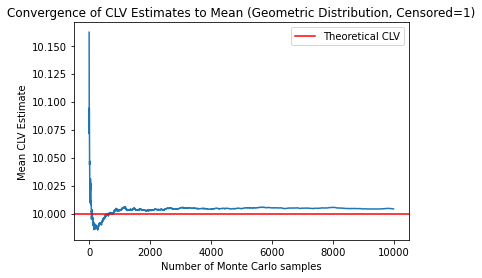

In [12]:
f.clv_convergence(clv_geom_c, clv_theory,n , 'Convergence of CLV Estimates to Mean (Geometric Distribution, Censored=1)')

**Confidence interval Monte Carlo**

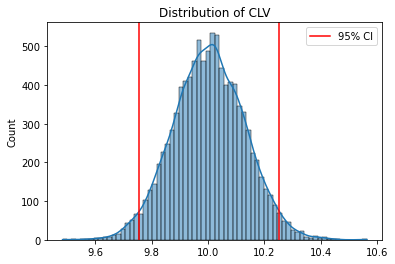

IC = [9.757016 , 10.250822 ] 


In [13]:
lower_geom_c, upper_geom_c = f.CI_plot_95(clv_geom_c, 0.05)

In [14]:
# GENERATE one sample to study the effect of boostrapping
Y_n =[]
T, A = f.generate_exponential(clv_theory, size, DureeObs)
Y_n.append(T)
Y_n.append(A)

**Confidence interval Bootstrapping**

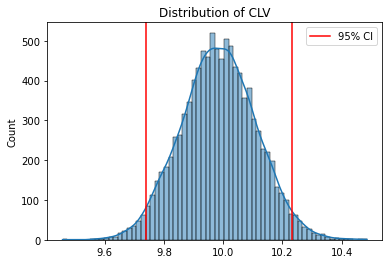

IC = [9.739860 , 10.233202 ] 


In [15]:
_,_ , clv_geom_cb = f.bootstrap_samples(Y_n, censored, f.geom_c_clv_estimator)
lower_geom_cb, upper_geom_cb  = f.CI_plot_95(clv_geom_cb, 0.05)

In [16]:
print("Confidence level : %.2f" % (f.confidence_lvl(lower_geom_cb, upper_geom_cb, clv_geom_c)))

Confidence level : 94.73


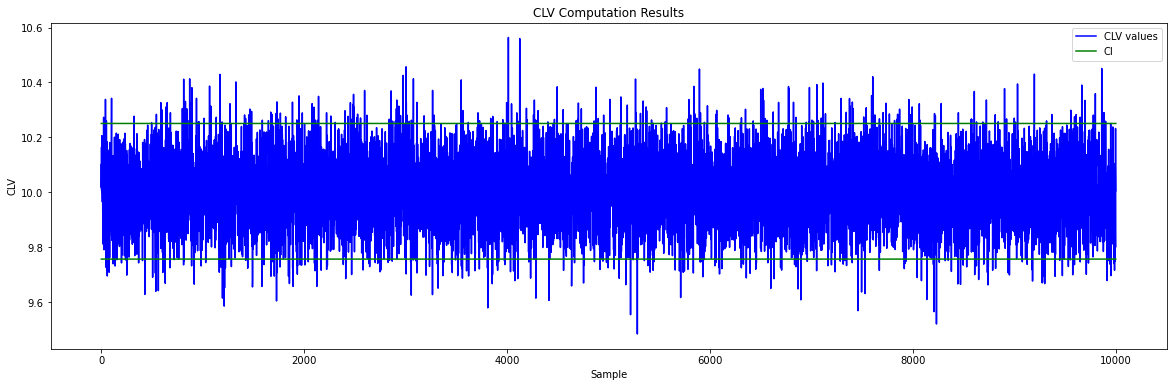

In [18]:
# plot confidence interval
f.CI_monoplot(clv_geom_c, np.full(size, lower_geom_c),np.full(size, upper_geom_c) )